In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

In [2]:
num_classes = 10
epochs = 20

In [48]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('dataset', kind='train')
X_test, y_test = mnist_reader.load_mnist('dataset', kind='t10k')

In [49]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [50]:
print(type(X_test))
print(type(y_test))
print(type(X_train))
print(type(y_train))
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train shape:  (60000, 28, 28, 1)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28, 1)
y_test shape:  (10000,)


In [53]:
X_train = X_train/255
X_test = X_test/255

In [55]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state = 12345)

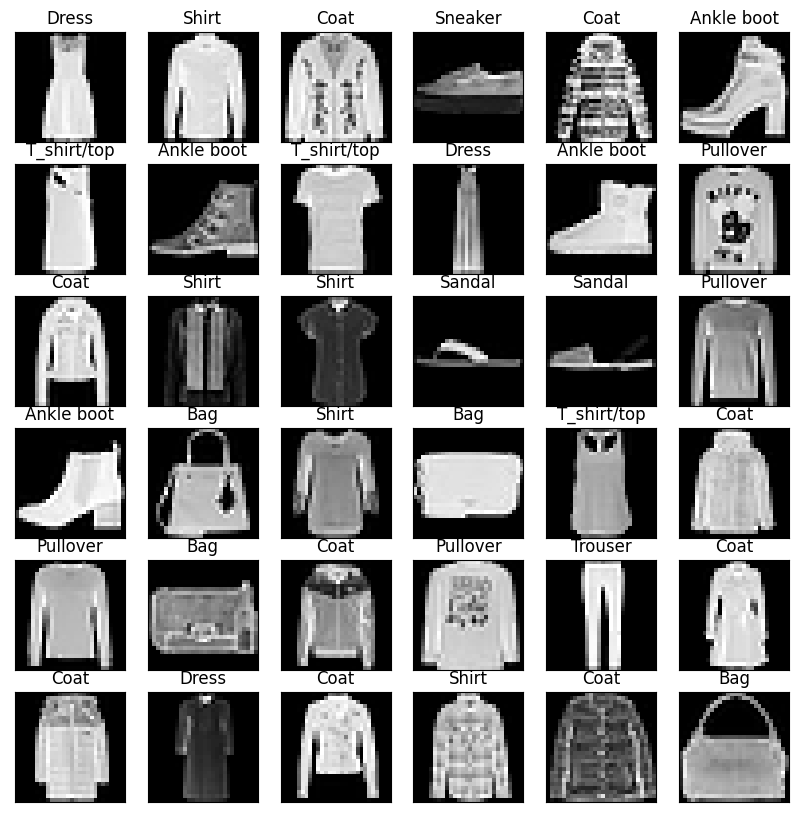

In [56]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap='gray')
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


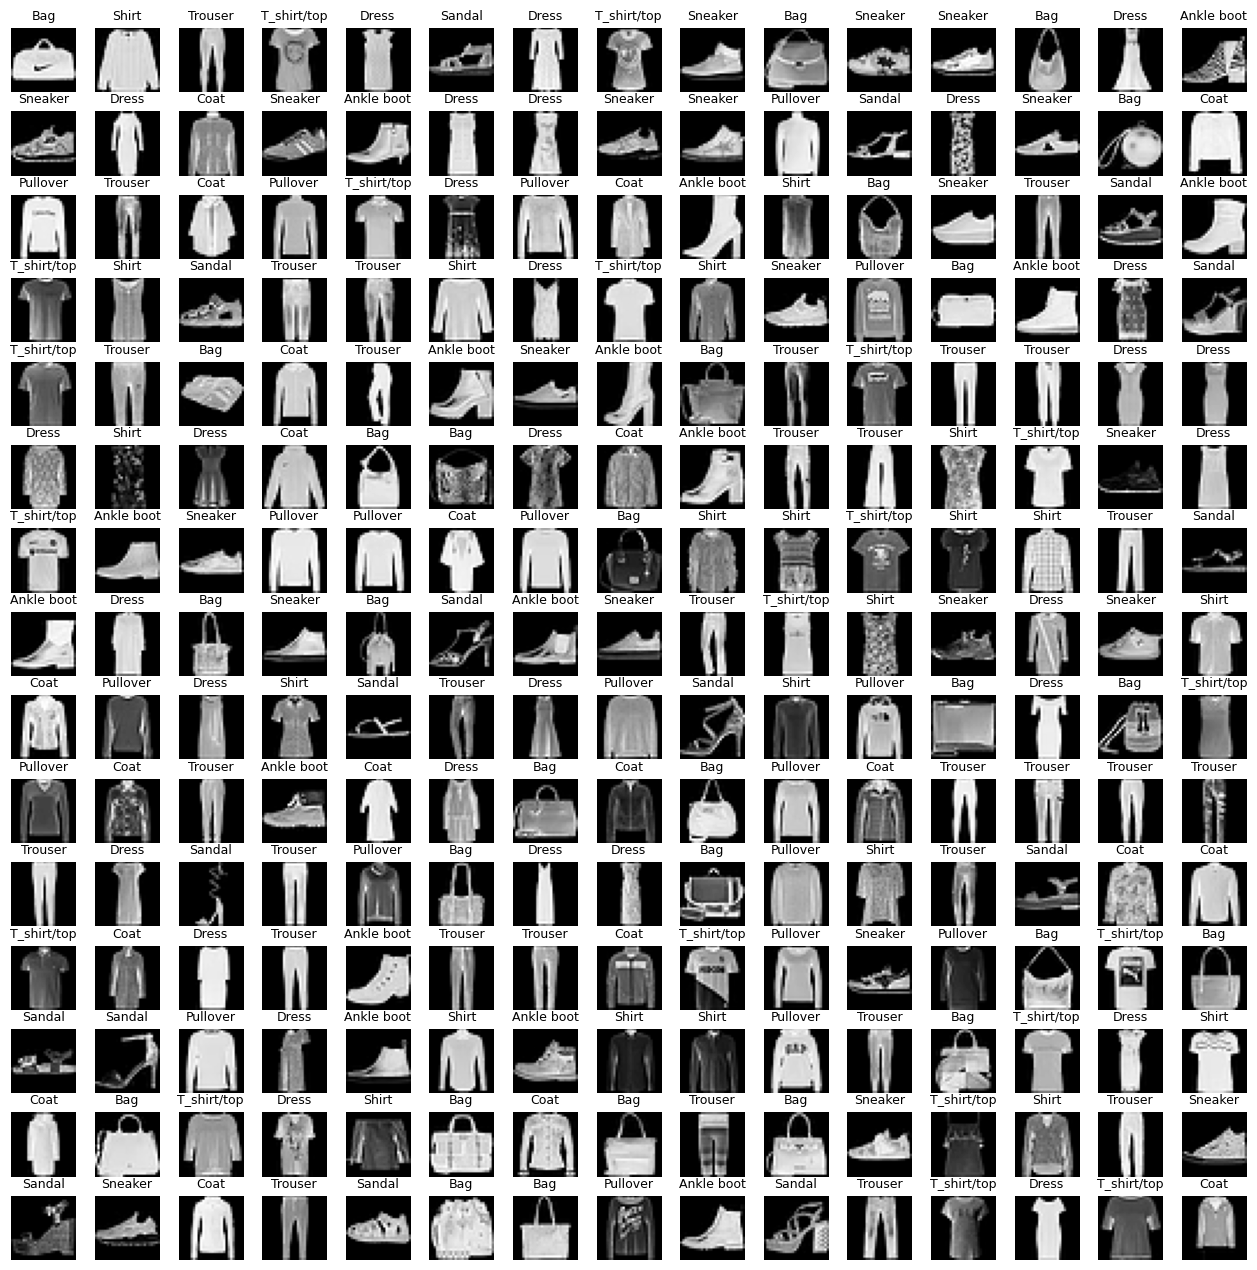

In [57]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index].reshape((28,28)), cmap='gray')
    labelindex = int(y_train[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [58]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
])

In [59]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [60]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(X_validate,y_validate),
)


Epoch 1/75
12/12 [==============================] - 7s 567ms/step - loss: 1.6565 - accuracy: 0.4680 - val_loss: 1.0289 - val_accuracy: 0.6756
Epoch 2/75
12/12 [==============================] - 7s 566ms/step - loss: 0.8552 - accuracy: 0.7090 - val_loss: 0.7227 - val_accuracy: 0.7472
Epoch 3/75
12/12 [==============================] - 6s 541ms/step - loss: 0.6704 - accuracy: 0.7613 - val_loss: 0.6097 - val_accuracy: 0.7872
Epoch 4/75
12/12 [==============================] - 6s 539ms/step - loss: 0.5850 - accuracy: 0.7918 - val_loss: 0.5464 - val_accuracy: 0.8138
Epoch 5/75
12/12 [==============================] - 6s 543ms/step - loss: 0.5339 - accuracy: 0.8130 - val_loss: 0.5013 - val_accuracy: 0.8310
Epoch 6/75
12/12 [==============================] - 7s 546ms/step - loss: 0.5023 - accuracy: 0.8249 - val_loss: 0.4730 - val_accuracy: 0.8403
Epoch 7/75
12/12 [==============================] - 6s 541ms/step - loss: 0.4779 - accuracy: 0.8337 - val_loss: 0.4491 - val_accuracy: 0.8482
Epoch 

Text(0.5, 1.0, 'Train - Accuracy')

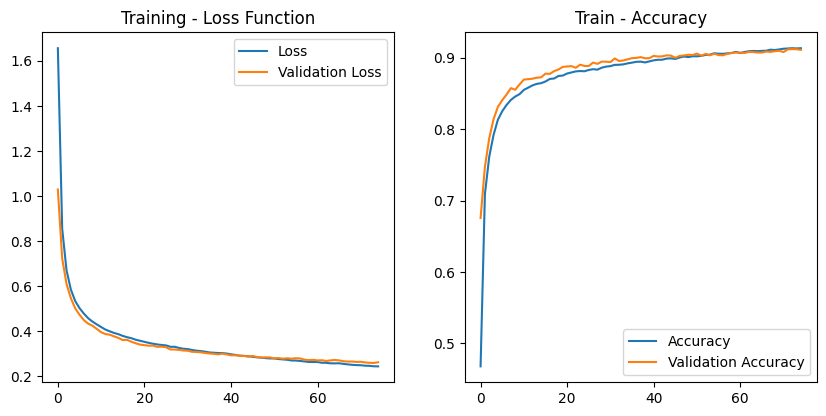

In [64]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [66]:
score = cnn_model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2867
Test Accuracy : 0.8953


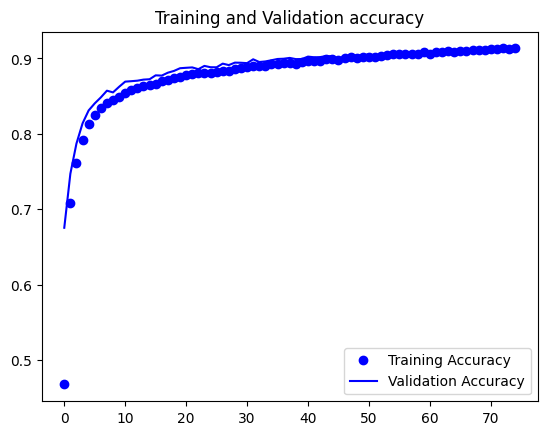

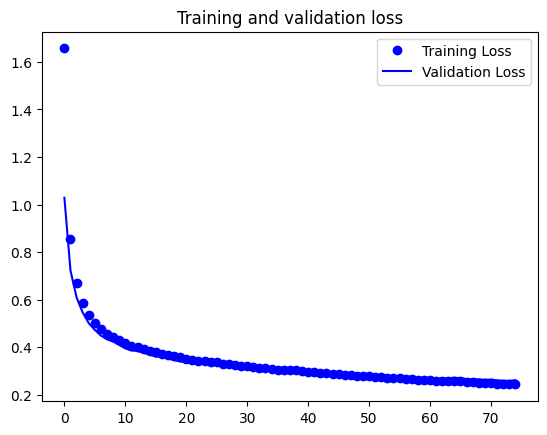

In [67]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [70]:
# Get the predictions for the test data
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [71]:
# Find correct and incorrect predictions
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

In [72]:
# Print classification report
target_names = ["Class {}".format(i) for i in range(10)]  # 10 classes for Fashion MNIST
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.83      0.84      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.85      0.82      0.83      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.85      0.83      0.84      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.69      0.73      0.71      1000
     Class 7       0.95      0.94      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



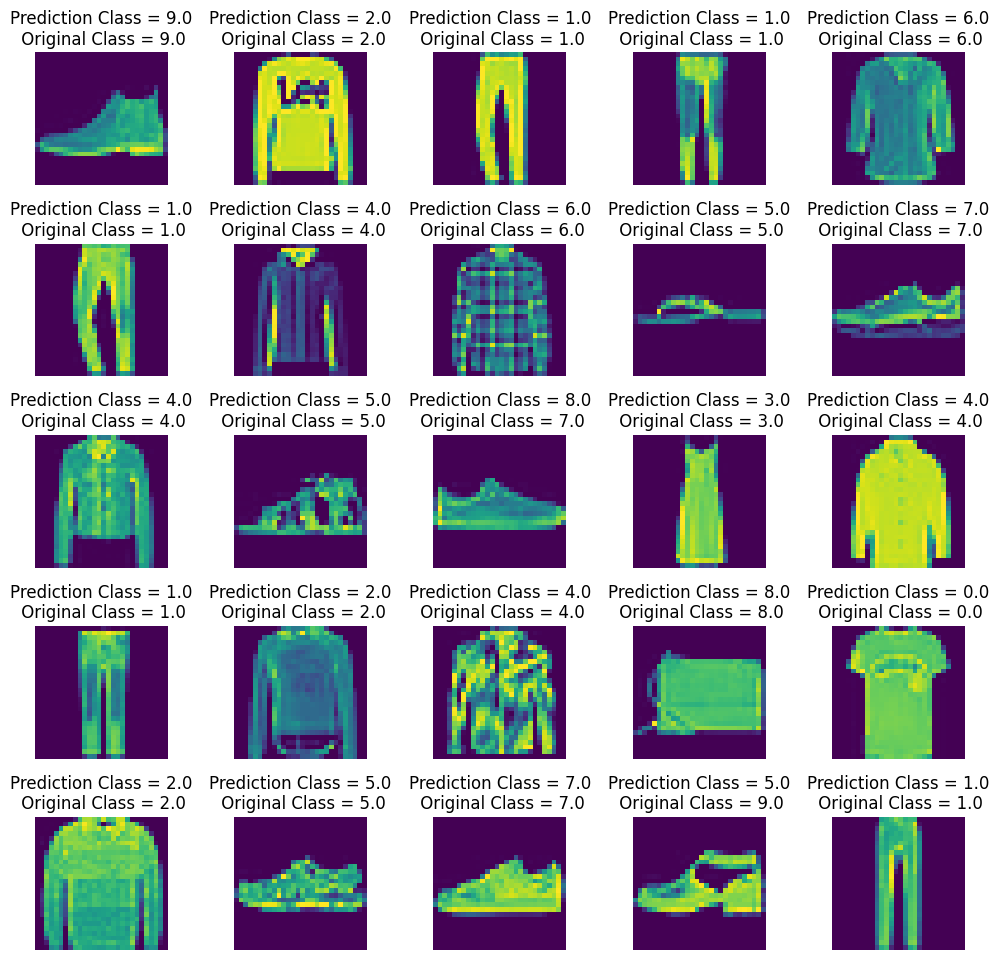

In [73]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)